In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans

class SpectralClustering:
    def __init__(self, n_clusters, sigma=1):
        self.n_clusters = n_clusters
        self.sigma = sigma
    
    def fit_predict(self, X):
        n_samples = X.shape[0]
        
        # compute pairwise distances
        pairwise_dists = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(i, n_samples):
                d = np.linalg.norm(X[i] - X[j])
                pairwise_dists[i,j] = d
                pairwise_dists[j,i] = d
        
        # compute similarity matrix
        W = np.exp(-pairwise_dists**2 / (2*self.sigma**2))
        
        # compute degree matrix
        D = np.diag(np.sum(W, axis=1))
        
        # compute Laplacian matrix
        L = D - W
#         D_sqrt = np.sqrt(np.linalg.inv(D))
#         L = np.dot(np.dot(D_sqrt, (D - W)), D_sqrt)
                
        # compute eigenvectors and eigenvalues of Laplacian matrix
        eigvals, eigvecs = eigsh(L, k=self.n_clusters+1, which='SM')
        eigvecs = eigvecs[:,1:]  # discard first eigenvector

        # run K-means on normalized eigenvectors
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        labels = kmeans.fit_predict(eigvecs)
        
        return labels

In [34]:
# np.linalg.eigh(spectral.W)

(array([4.59890849e-13, 6.20029724e-12, 1.50120297e-11, 4.47773448e-11,
        4.63063588e-11, 6.82326703e-11, 1.14324090e-10, 1.68245989e-10,
        3.20494702e-10, 6.84349523e-10, 7.59971068e-10, 7.65173352e-10,
        7.88830126e-10, 1.48858432e-09, 1.56988841e-09, 1.70142651e-09,
        1.93914664e-09, 3.26956059e-09, 3.29139304e-09, 4.20504652e-09,
        4.33897659e-09, 4.83336307e-09, 9.70444754e-09, 1.03712086e-08,
        1.13271131e-08, 1.54080951e-08, 1.60363399e-08, 2.19278103e-08,
        2.91678663e-08, 3.20784373e-08, 3.69720563e-08, 4.38325013e-08,
        5.26255291e-08, 6.56246729e-08, 7.33276553e-08, 1.12574123e-07,
        1.32704386e-07, 1.80030425e-07, 2.10487053e-07, 2.17629885e-07,
        2.19297532e-07, 2.57991128e-07, 2.64895723e-07, 2.92303530e-07,
        4.03437114e-07, 5.29798352e-07, 5.75697847e-07, 6.87394474e-07,
        8.28697276e-07, 8.38995324e-07, 1.21493579e-06, 1.38253717e-06,
        1.54727578e-06, 1.57968937e-06, 1.79414077e-06, 2.411830

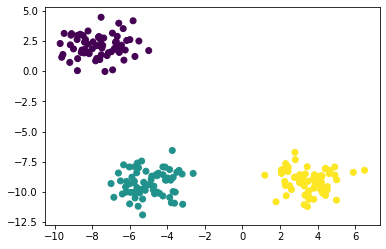

In [26]:
# generate sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=200, centers=3, random_state=41)

# run Spectral Clustering
spectral = SpectralClustering(n_clusters=3, sigma=1)
labels = spectral.fit_predict(X)

# visualize clusters
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()